Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crime_type   1000 non-null   object 
 1   location     1000 non-null   object 
 2   time_of_day  1000 non-null   object 
 3   severity     1000 non-null   object 
 4   latitude     1000 non-null   float64
 5   longitude    1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB
None


<ipython-input-1-8a5e11cce514>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


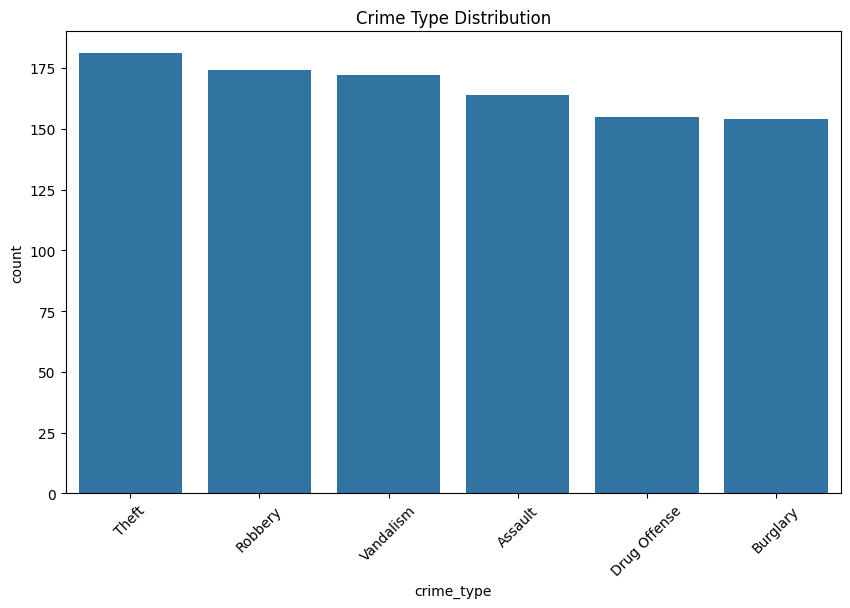

Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.48      0.43        67
         Low       0.36      0.36      0.36        66
      Medium       0.35      0.27      0.31        67

    accuracy                           0.37       200
   macro avg       0.37      0.37      0.37       200
weighted avg       0.37      0.37      0.37       200



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sqlite3

# Load dataset (replace with actual dataset path)
data = pd.read_csv('crime_data.csv')

# Data Preprocessing
print("Initial Data Overview:")
print(data.info())

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='crime_type', data=data, order=data['crime_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Crime Type Distribution")
plt.show()

# Interactive Map using Folium
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
for _, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['crime_type']).add_to(m)
m.save('crime_map.html')

# Machine Learning - Predicting Crime Severity
features = ['time_of_day', 'location', 'crime_type']  # Adjust according to dataset
X = pd.get_dummies(data[features])
y = data['severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save results
data.to_csv('processed_crime_data.csv', index=False)